# Head to Head Comparisons of the Algorithms
Choose one scenario below and launch a Small Monte Carlo estimation ! 

In [21]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time

from tdfs.routines import tdfs_routine
from rho_rand.routines import rho_rand_routine
from mega.routines import mega_routine
from musical_chairs.routines import mc_routine

## First Scenario
This scenario is *easy* with regard to the bandit problem at hand

In [22]:
#  UNIVERSE PARAMETERS
n_users = 3
n_arms = 5
t_horizon = 2000
arm_means = [0.2, 0.3, 0.5, 0.75, 0.9]
best_arms_mean = np.sort(arm_means)[-n_users:]

# MEGA PARAMETERS
mega_params = {
    'c': 0.1,
    'd': 0.05,
    'alpha': 0.5,
    'beta': 0.8,
    'persistence_proba_init': 0.6
}

# MUSICAL CHAIRS PARAMETERS
musical_c_params = {
    't0': 100,
    't1': 400
}

# MONTE-CARLO PARAMETERS
mc_horizon = 10

## Second Scenario
Arm Ranking is a not so simple task

In [25]:
#  UNIVERSE PARAMETERS
n_users = 3
n_arms = 5
t_horizon = 2000
arm_means = [0.2, 0.3, 0.33, 0.85, 0.9] # + 0.1, 0.45 0.6
best_arms_mean = np.sort(arm_means)[-n_users:]

# MEGA PARAMETERS
mega_params = {
    'c': 0.1,
    'd': 0.05,
    'alpha': 0.5,
    'beta': 0.8,
    'persistence_proba_init': 0.6
}

# MUSICAL CHAIRS PARAMETERS
musical_c_params = {
    't0': 100,
    't1': 400
}

# MONTE-CARLO PARAMETERS
mc_horizon = 10

## Third Scenario
The cognitive network is *crowded*

In [31]:
#  UNIVERSE PARAMETERS
n_users = 5
n_arms = 5
t_horizon = 2000
arm_means = [0.2, 0.3, 0.5, 0.75, 0.9]
best_arms_mean = np.sort(arm_means)[-n_users:]

# MEGA PARAMETERS
mega_params = {
    'c': 0.1,
    'd': 0.05,
    'alpha': 0.5,
    'beta': 0.8,
    'persistence_proba_init': 0.6
}

# MUSICAL CHAIRS PARAMETERS
musical_c_params = {
    't0': 100,
    't1': 400
}

# MONTE-CARLO PARAMETERS
mc_horizon = 10

## Fourth Scenario

In [34]:
#  UNIVERSE PARAMETERS
n_users = 6
n_arms = 9
t_horizon = 3000
arm_means = [0.1, 0.2, 0.45, 0.5, 0.6, 0.75, 0.8, 0.85, 0.9]
best_arms_mean = np.sort(arm_means)[-n_users:]

# MEGA PARAMETERS
mega_params = {
    'c': 0.1,
    'd': 0.05,
    'alpha': 0.5,
    'beta': 0.8,
    'persistence_proba_init': 0.6
}

# MUSICAL CHAIRS PARAMETERS
musical_c_params = {
    't0': 100,
    't1': 400
}

# MONTE-CARLO PARAMETERS
mc_horizon = 10

# Head to head comparison of algs
This next run is designed just to show the results we obtain with TDFS

In [35]:
rewards = np.zeros((8, t_horizon))
speed = np.zeros(8)

start = time.time()
for t in range(mc_horizon):
    rewards[0] += tdfs_routine(n_users, n_arms, t_horizon, arm_means, alg='ucb')[:, 0]
speed[0] = time.time() - start

start = time.time()
for t in range(mc_horizon):
    rewards[1] += rho_rand_routine(n_users, n_arms, t_horizon, arm_means)[:, 0]
speed[1] = time.time() - start

start = time.time()
for t in range(mc_horizon):
    rewards[2] += mega_routine(n_users, mega_params, n_arms, t_horizon, arm_means, alg='eps')[0].sum(axis=0)
speed[2] = time.time() - start
    
start = time.time()
for t in range(mc_horizon):
    rewards[3] += mega_routine(n_users, mega_params, n_arms, t_horizon, arm_means, alg='ucb')[0].sum(axis=0)
speed[3] = time.time() - start
    
start = time.time()
for t in range(mc_horizon):
    rewards[4] += tdfs_routine(n_users, n_arms, t_horizon, arm_means, alg='ts')[:, 0]
speed[4] = time.time() - start
    
start = time.time()
for t in range(mc_horizon):
    rewards[5] += mega_routine(n_users, mega_params, n_arms, t_horizon, arm_means, alg='ts')[0].sum(axis=0)
speed[5] = time.time() - start
    
start = time.time()
for t in range(mc_horizon):
    rewards[6] += rho_rand_routine(n_users, n_arms, t_horizon, arm_means, alg='ts')[:, 0]
speed[6] = time.time() - start

start = time.time()
for t in range(mc_horizon):
    rewards[7] += mc_routine(n_users, musical_c_params, n_arms, t_horizon, arm_means)[:, 0]
speed[7] = time.time() - start
    
rewards /= mc_horizon
speed

C:\Users\Pierre\Downloads\MVA\RL\rl-project\musical_chairs\users.py:34: RuntimeWarning: invalid value encountered in true_divide
  user_stat = np.sum(self.rewards, axis=1) / self.draws


array([  44.37339067,   47.4753263 ,   29.60822868,   29.08701658,
        160.13016248,   41.22870421,   49.17829466,    7.36091161])

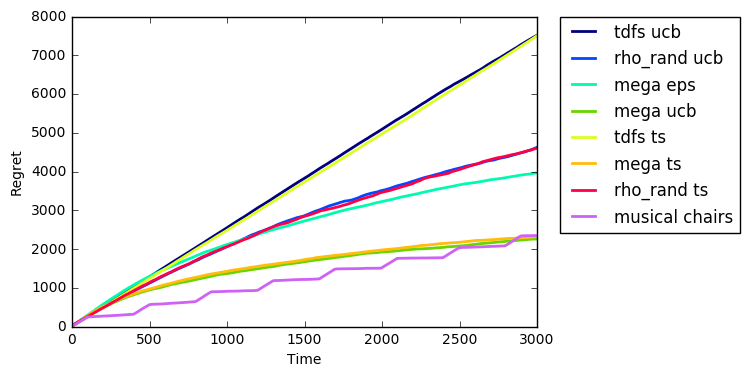

In [48]:
plt.ylabel("Regret")
plt.xlabel("Time")
cmap = plt.get_cmap("gist_ncar")
label = ["tdfs ucb", "rho_rand ucb", "mega eps", "mega ucb", "tdfs ts","mega ts", "rho_rand ts",  "musical chairs"]
regret = np.cumsum(best_arms_mean.sum() - rewards, axis=1)

for i in range(len(label)):
    
    plt.plot(regret[i], linewidth=2, color=cmap(float(i)/ len(label)), label=label[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()